# <center> Exploratory Data Analysis (EDA) <center>

 ## 1. Descriptive Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Load the cleaned data
df = pd.read_csv('/Users/bkh42/Downloads/cleaned_household_energy_consumption.csv')

# Convert datetime column back to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Calculate and display basic statistics
print("Descriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06   
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00 

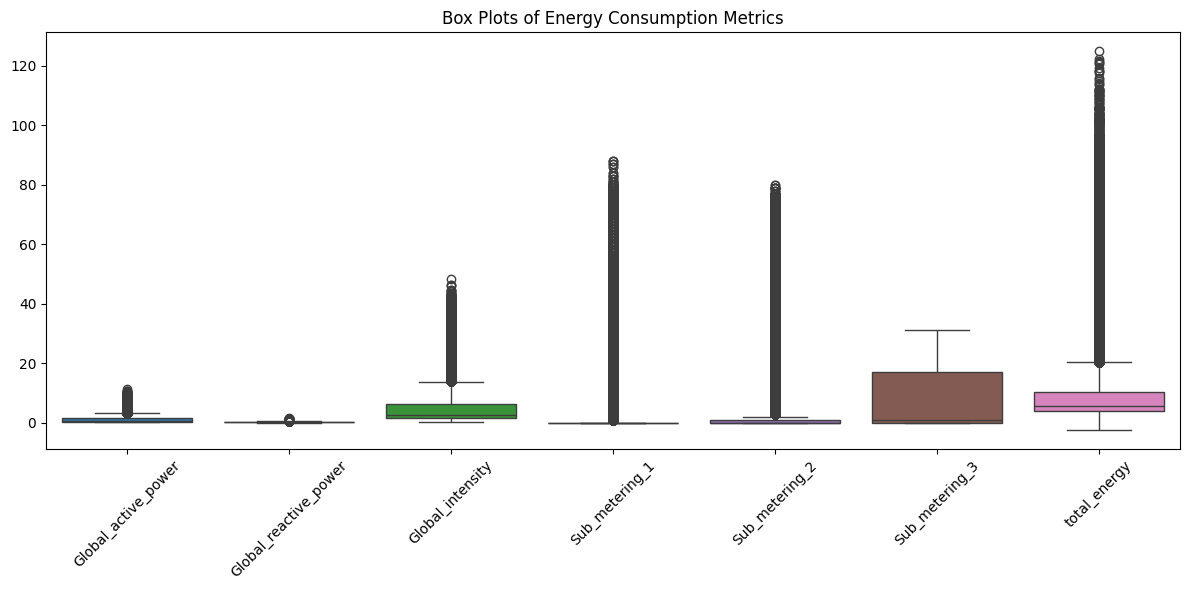

In [7]:

# Visualize basic statistics using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Global_active_power', 'Global_reactive_power', 'Global_intensity', 
                     'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'total_energy']])
plt.title('Box Plots of Energy Consumption Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

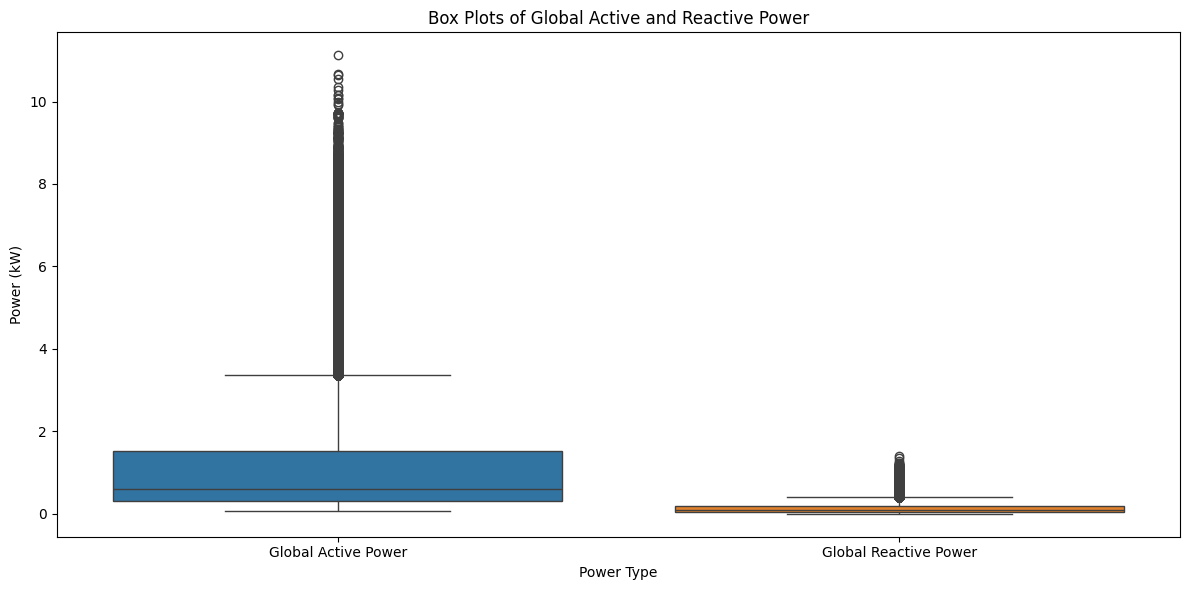

In [8]:
# Create box plot for global_active_power and global_reactive_power
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Global_active_power', 'Global_reactive_power']])

# Set labels and title
plt.title('Box Plots of Global Active and Reactive Power')
plt.xlabel('Power Type')
plt.ylabel('Power (kW)')

# Adjust x-axis labels
plt.xticks(ticks=[0, 1], labels=['Global Active Power', 'Global Reactive Power'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

From the visualization, I can explain several key insights about the power consumption patterns and relationship between active and reactive power:

### Magnitude Difference:
- Active Power shows significantly higher values (up to 11kW) compared to Reactive Power (up to 1.5kW).
- This indicates that most of the power consumed in the household is active power, which is used for actual work (like running appliances, heating, lighting).

### Variation Patterns:
- Active Power shows greater variation (larger box and longer whiskers).
- The blue box (interquartile range) for Active Power is much larger, suggesting more fluctuation in daily usage.
- Reactive Power stays more consistent (smaller box and shorter whiskers).

### Outliers:
- Active Power has many outliers (dots) extending upward, suggesting occasional high-power events (perhaps when multiple high-power appliances run simultaneously).
- Reactive Power has fewer outliers, indicating more stable reactive power demands.

### Baseline Consumption:
- Active Power has a higher baseline (median line in box) than Reactive Power.
- Reactive Power's median is close to zero, which is typical for residential settings.

### Distribution Shape:
- Both measurements show asymmetric distributions (skewed upward).
- More concentration of values in the lower ranges with occasional spikes to higher values.

### This tells us that:
- The household primarily consumes active power for actual work.
- Power consumption has regular patterns with occasional spikes.
- The electrical system is relatively efficient (low reactive power compared to active power).
- There are likely regular high-power events that cause the outliers in active power consumption.


## 2.Time Series Analysis
Purpose: To identify trends, seasonality, and other patterns in energy consumption over time.



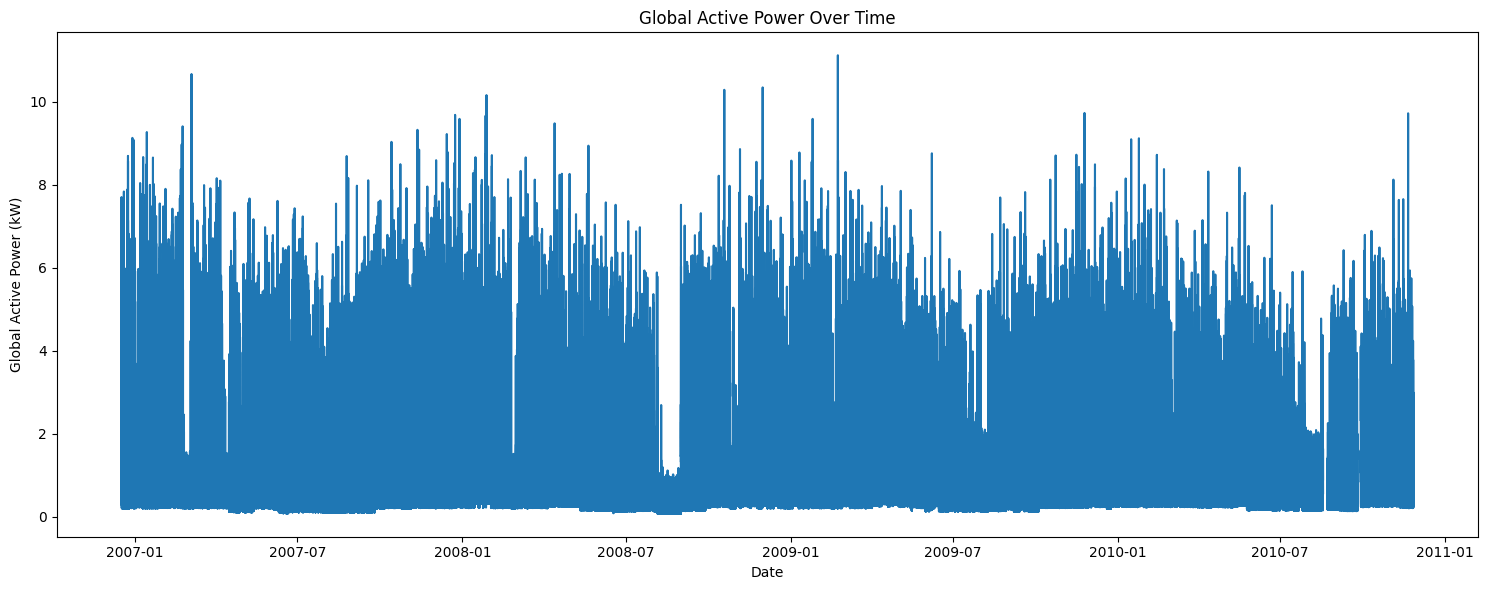

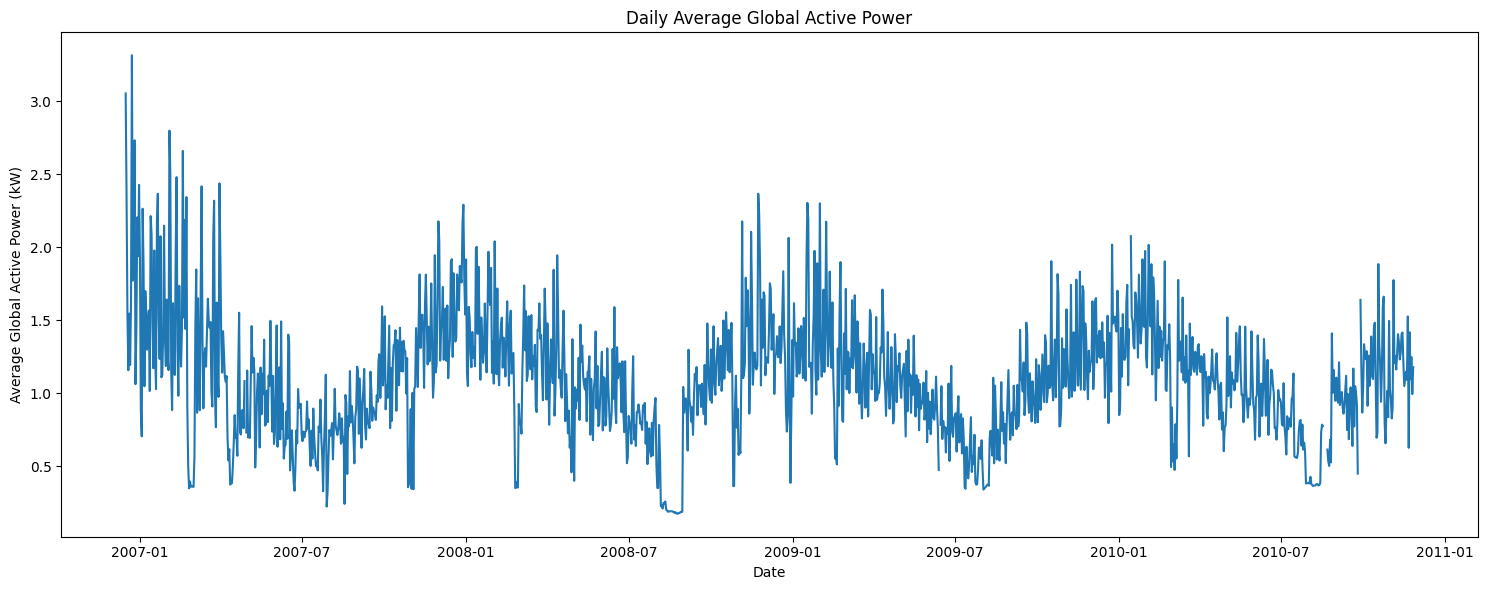

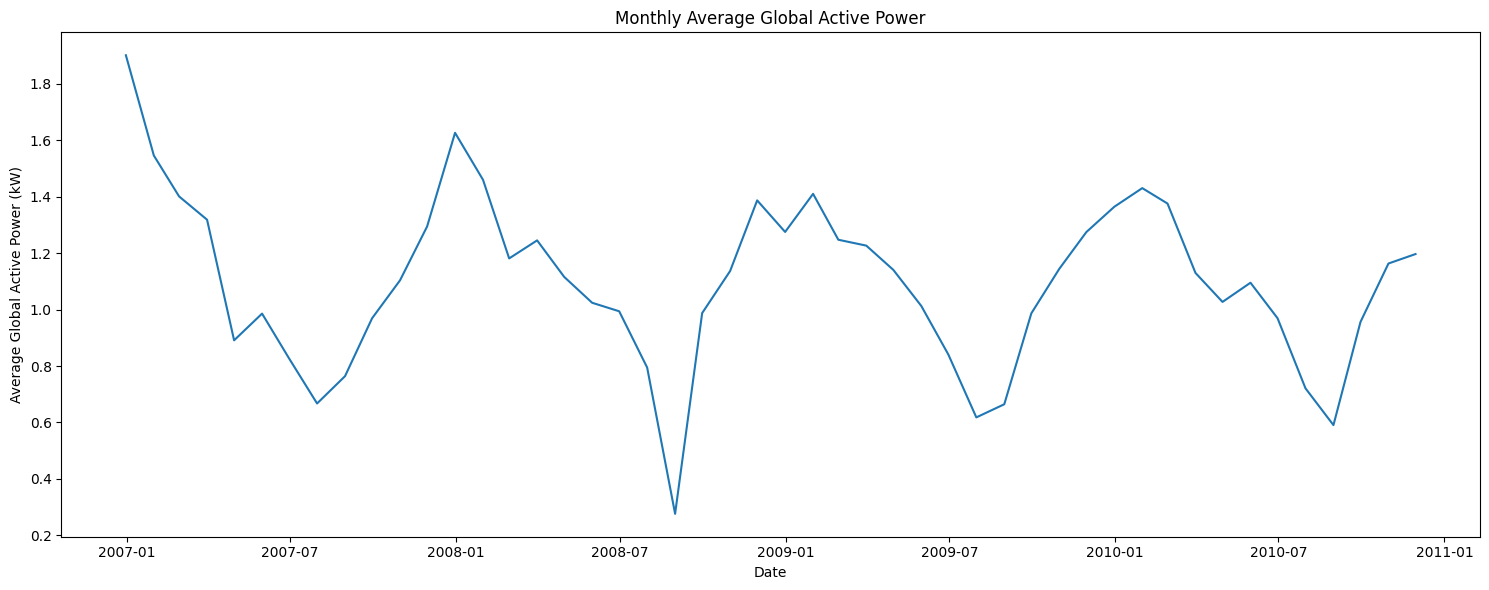

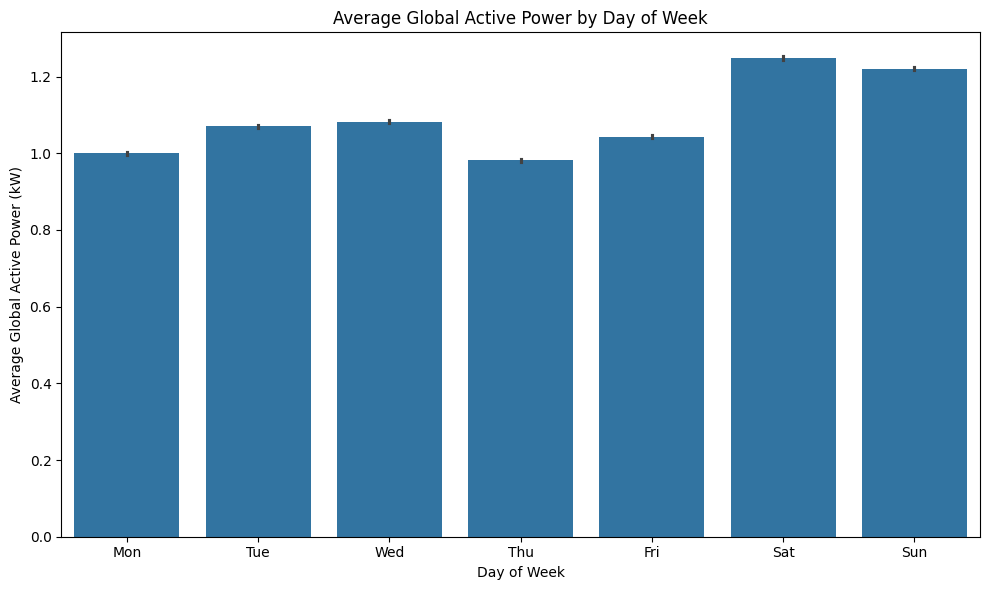

In [9]:
# Plot global active power over time
plt.figure(figsize=(15, 6))
plt.plot(df['datetime'], df['Global_active_power'])
plt.title('Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.tight_layout()
plt.show()

# Plot daily average of global active power
daily_avg = df.resample('D', on='datetime')['Global_active_power'].mean()
plt.figure(figsize=(15, 6))
plt.plot(daily_avg.index, daily_avg.values)
plt.title('Daily Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Average Global Active Power (kW)')
plt.tight_layout()
plt.show()

# Plot monthly average of global active power
monthly_avg = df.resample('M', on='datetime')['Global_active_power'].mean()
plt.figure(figsize=(15, 6))
plt.plot(monthly_avg.index, monthly_avg.values)
plt.title('Monthly Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Average Global Active Power (kW)')
plt.tight_layout()
plt.show()

# Plot average energy consumption by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x=df['day_of_week'], y=df['Global_active_power'])
plt.title('Average Global Active Power by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Global Active Power (kW)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

## 3. Correlation Analysis
Purpose: To examine the relationships between different energy consumption metrics.

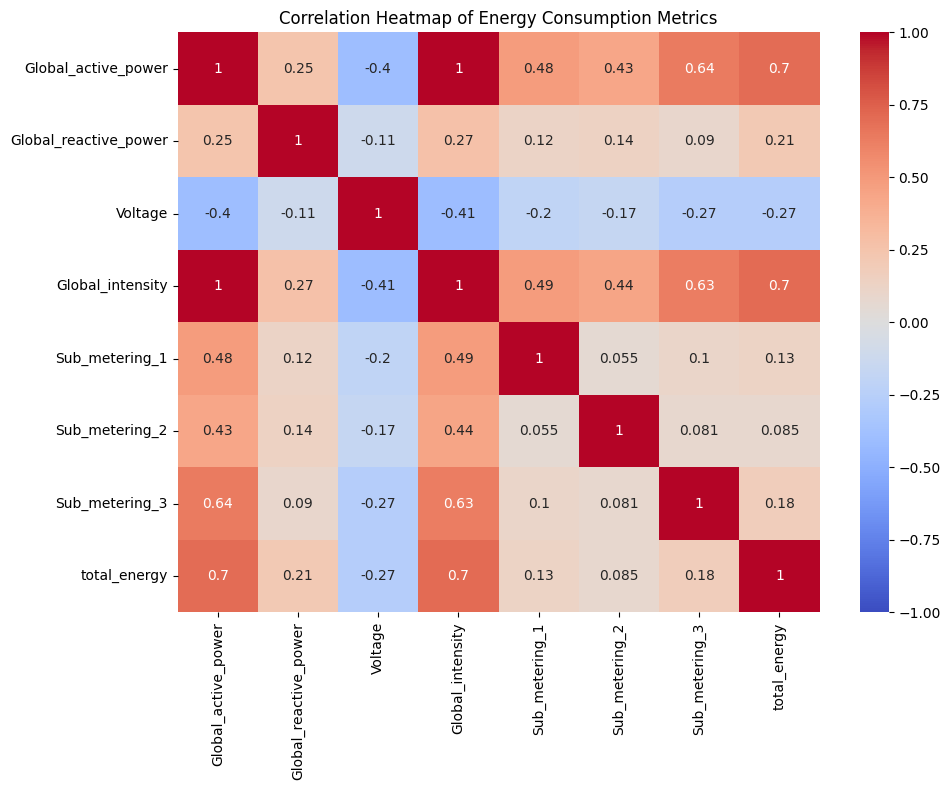

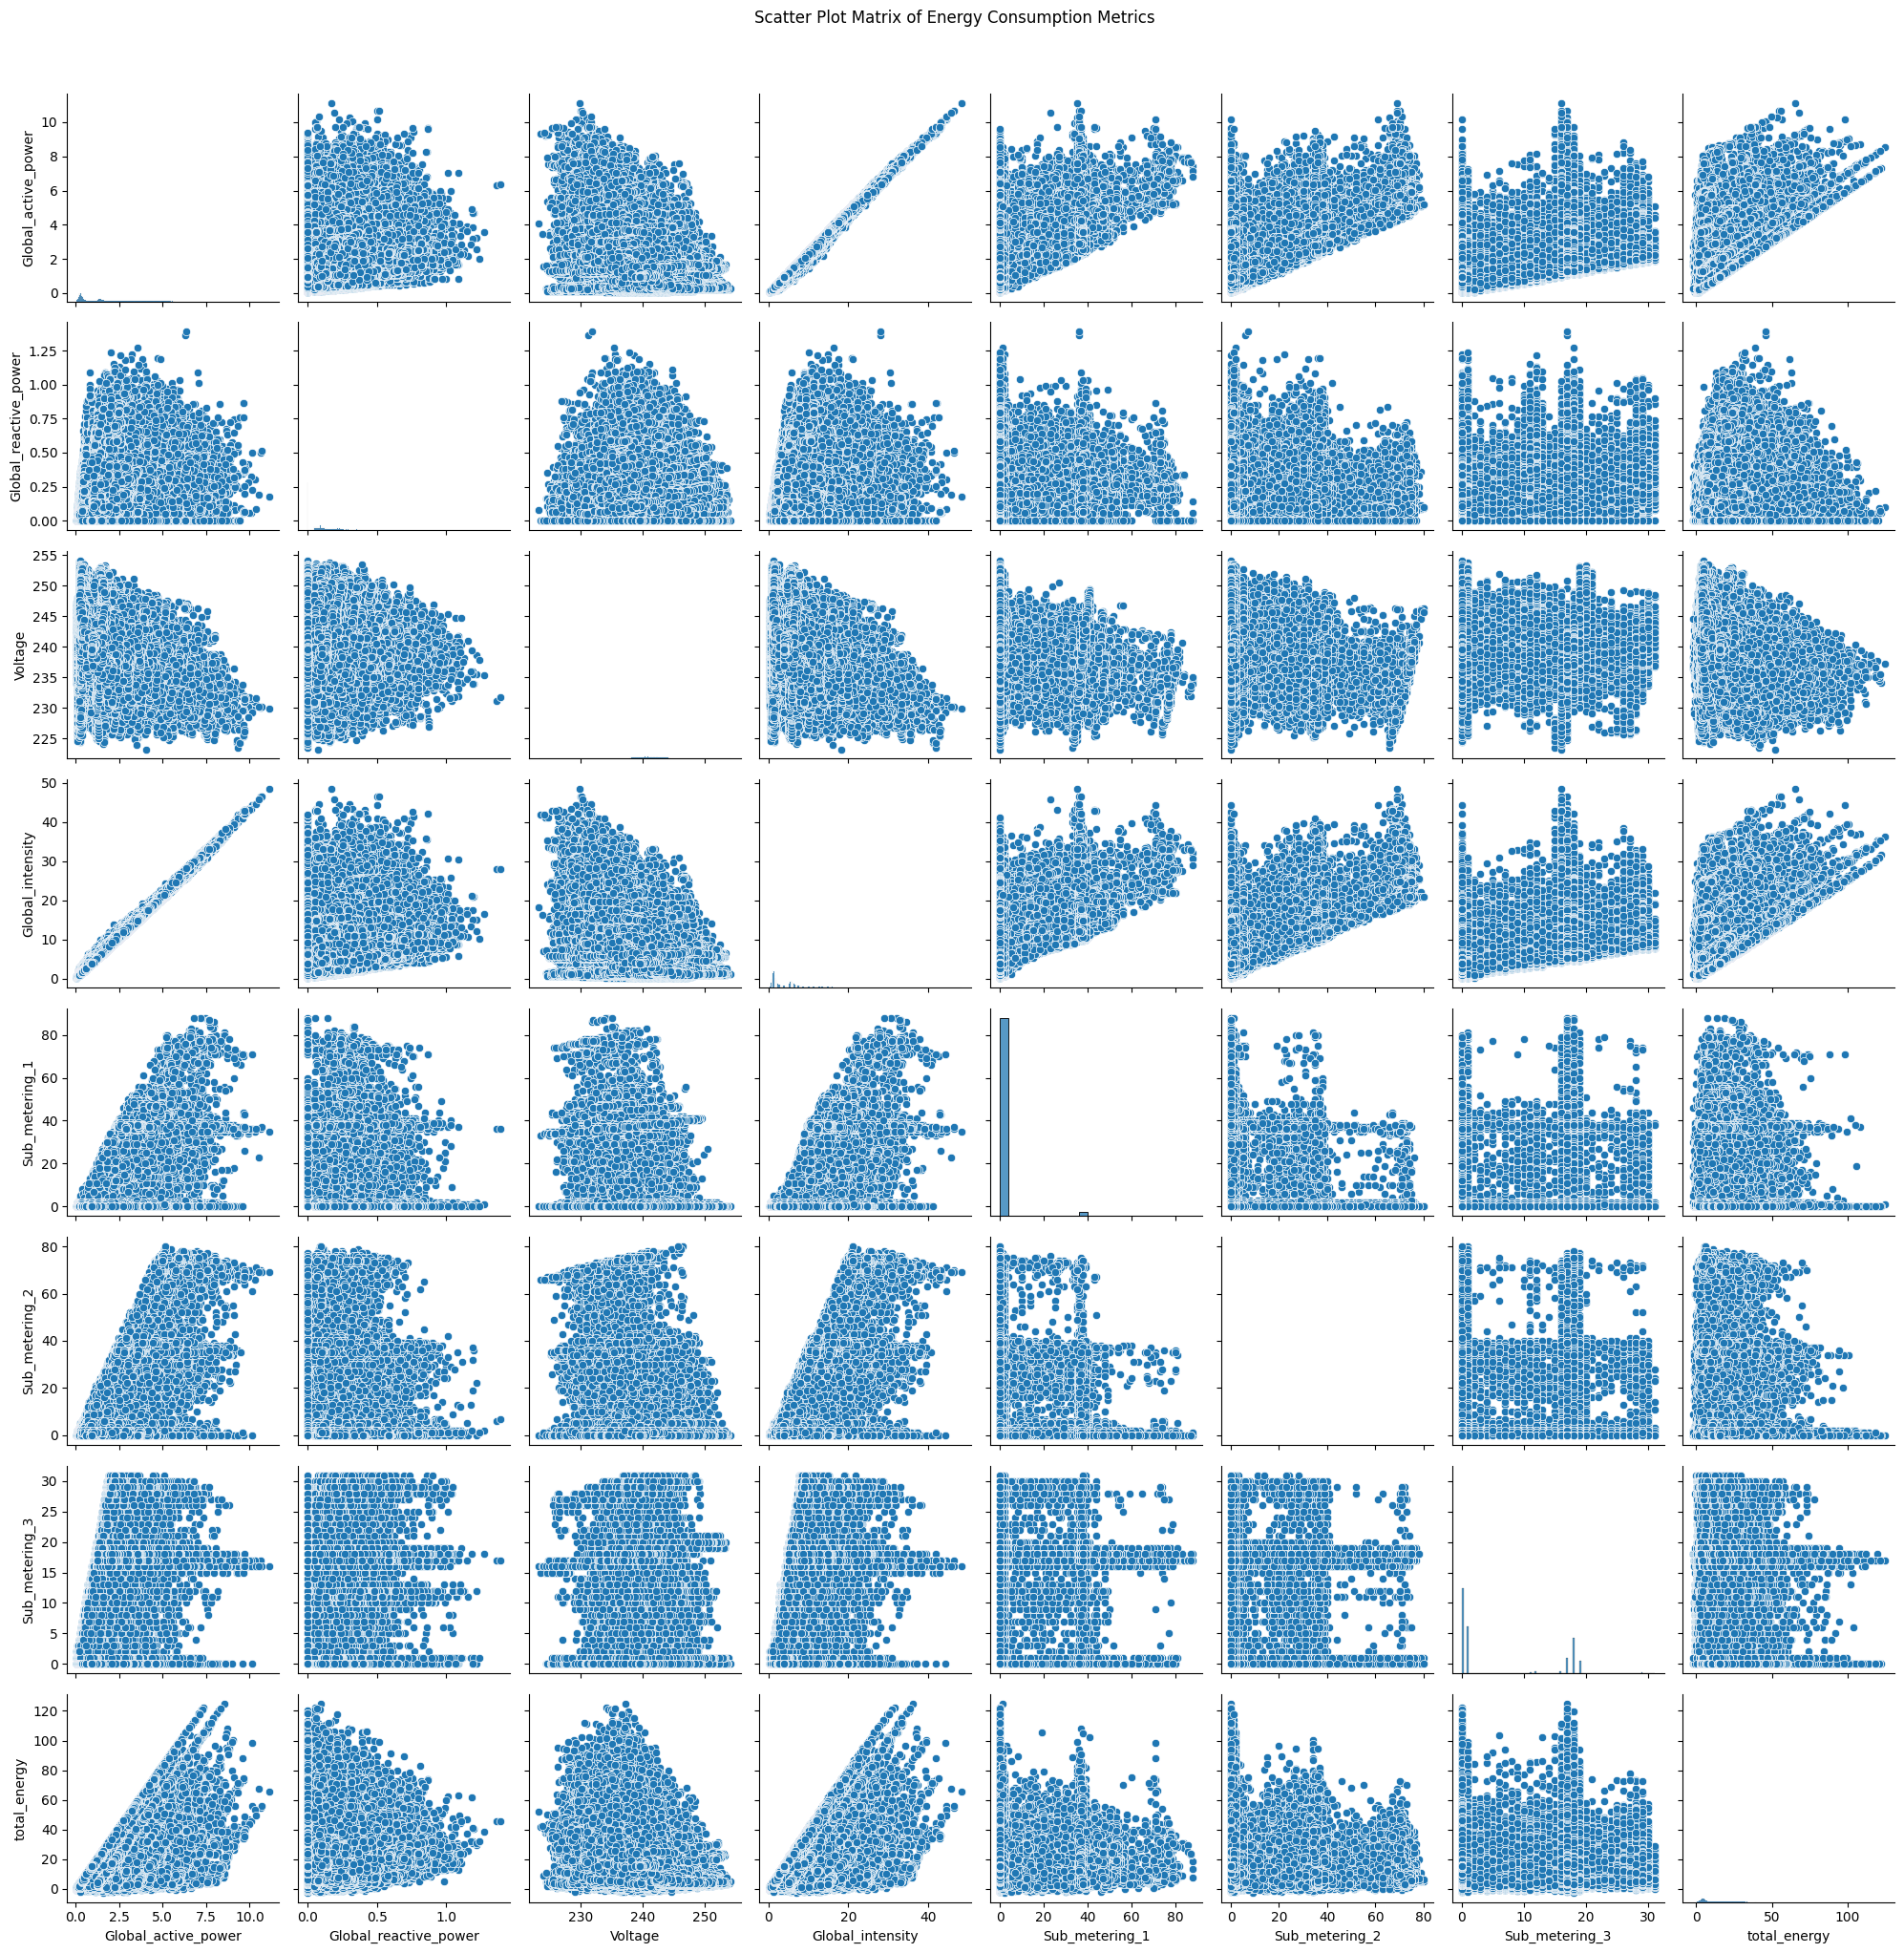

In [10]:
# Calculate correlation matrix
correlation_matrix = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
                         'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'total_energy']].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Energy Consumption Metrics')
plt.tight_layout()
plt.show()





Here are 5 simple key takeaways from the correlation heatmap:

 1. Global Active Power and Intensity:
- These are perfectly matched (correlation = 1.0), meaning they essentially measure the same thing in different units.

 2. Voltage:
- Has a negative relationship with most metrics (especially with active power and intensity), indicating that when voltage drops, power consumption tends to increase.

 3. The Three Sub-Meters:
- Measure different, independent systems or appliances (very low correlations between them: 0.055 to 0.1), suggesting they monitor separate circuits in the house.

 4. Total Energy Consumption:
- Strongly influenced by active power and intensity (0.7 correlation with both), but not much by reactive power (0.21).

 5. Reactive Power:
- Has weak correlations with all other metrics (highest is 0.27), suggesting it operates independently of other power consumption patterns in the household.

These insights provide a clear picture of how different electrical measurements relate to each other in this household's power consumption.


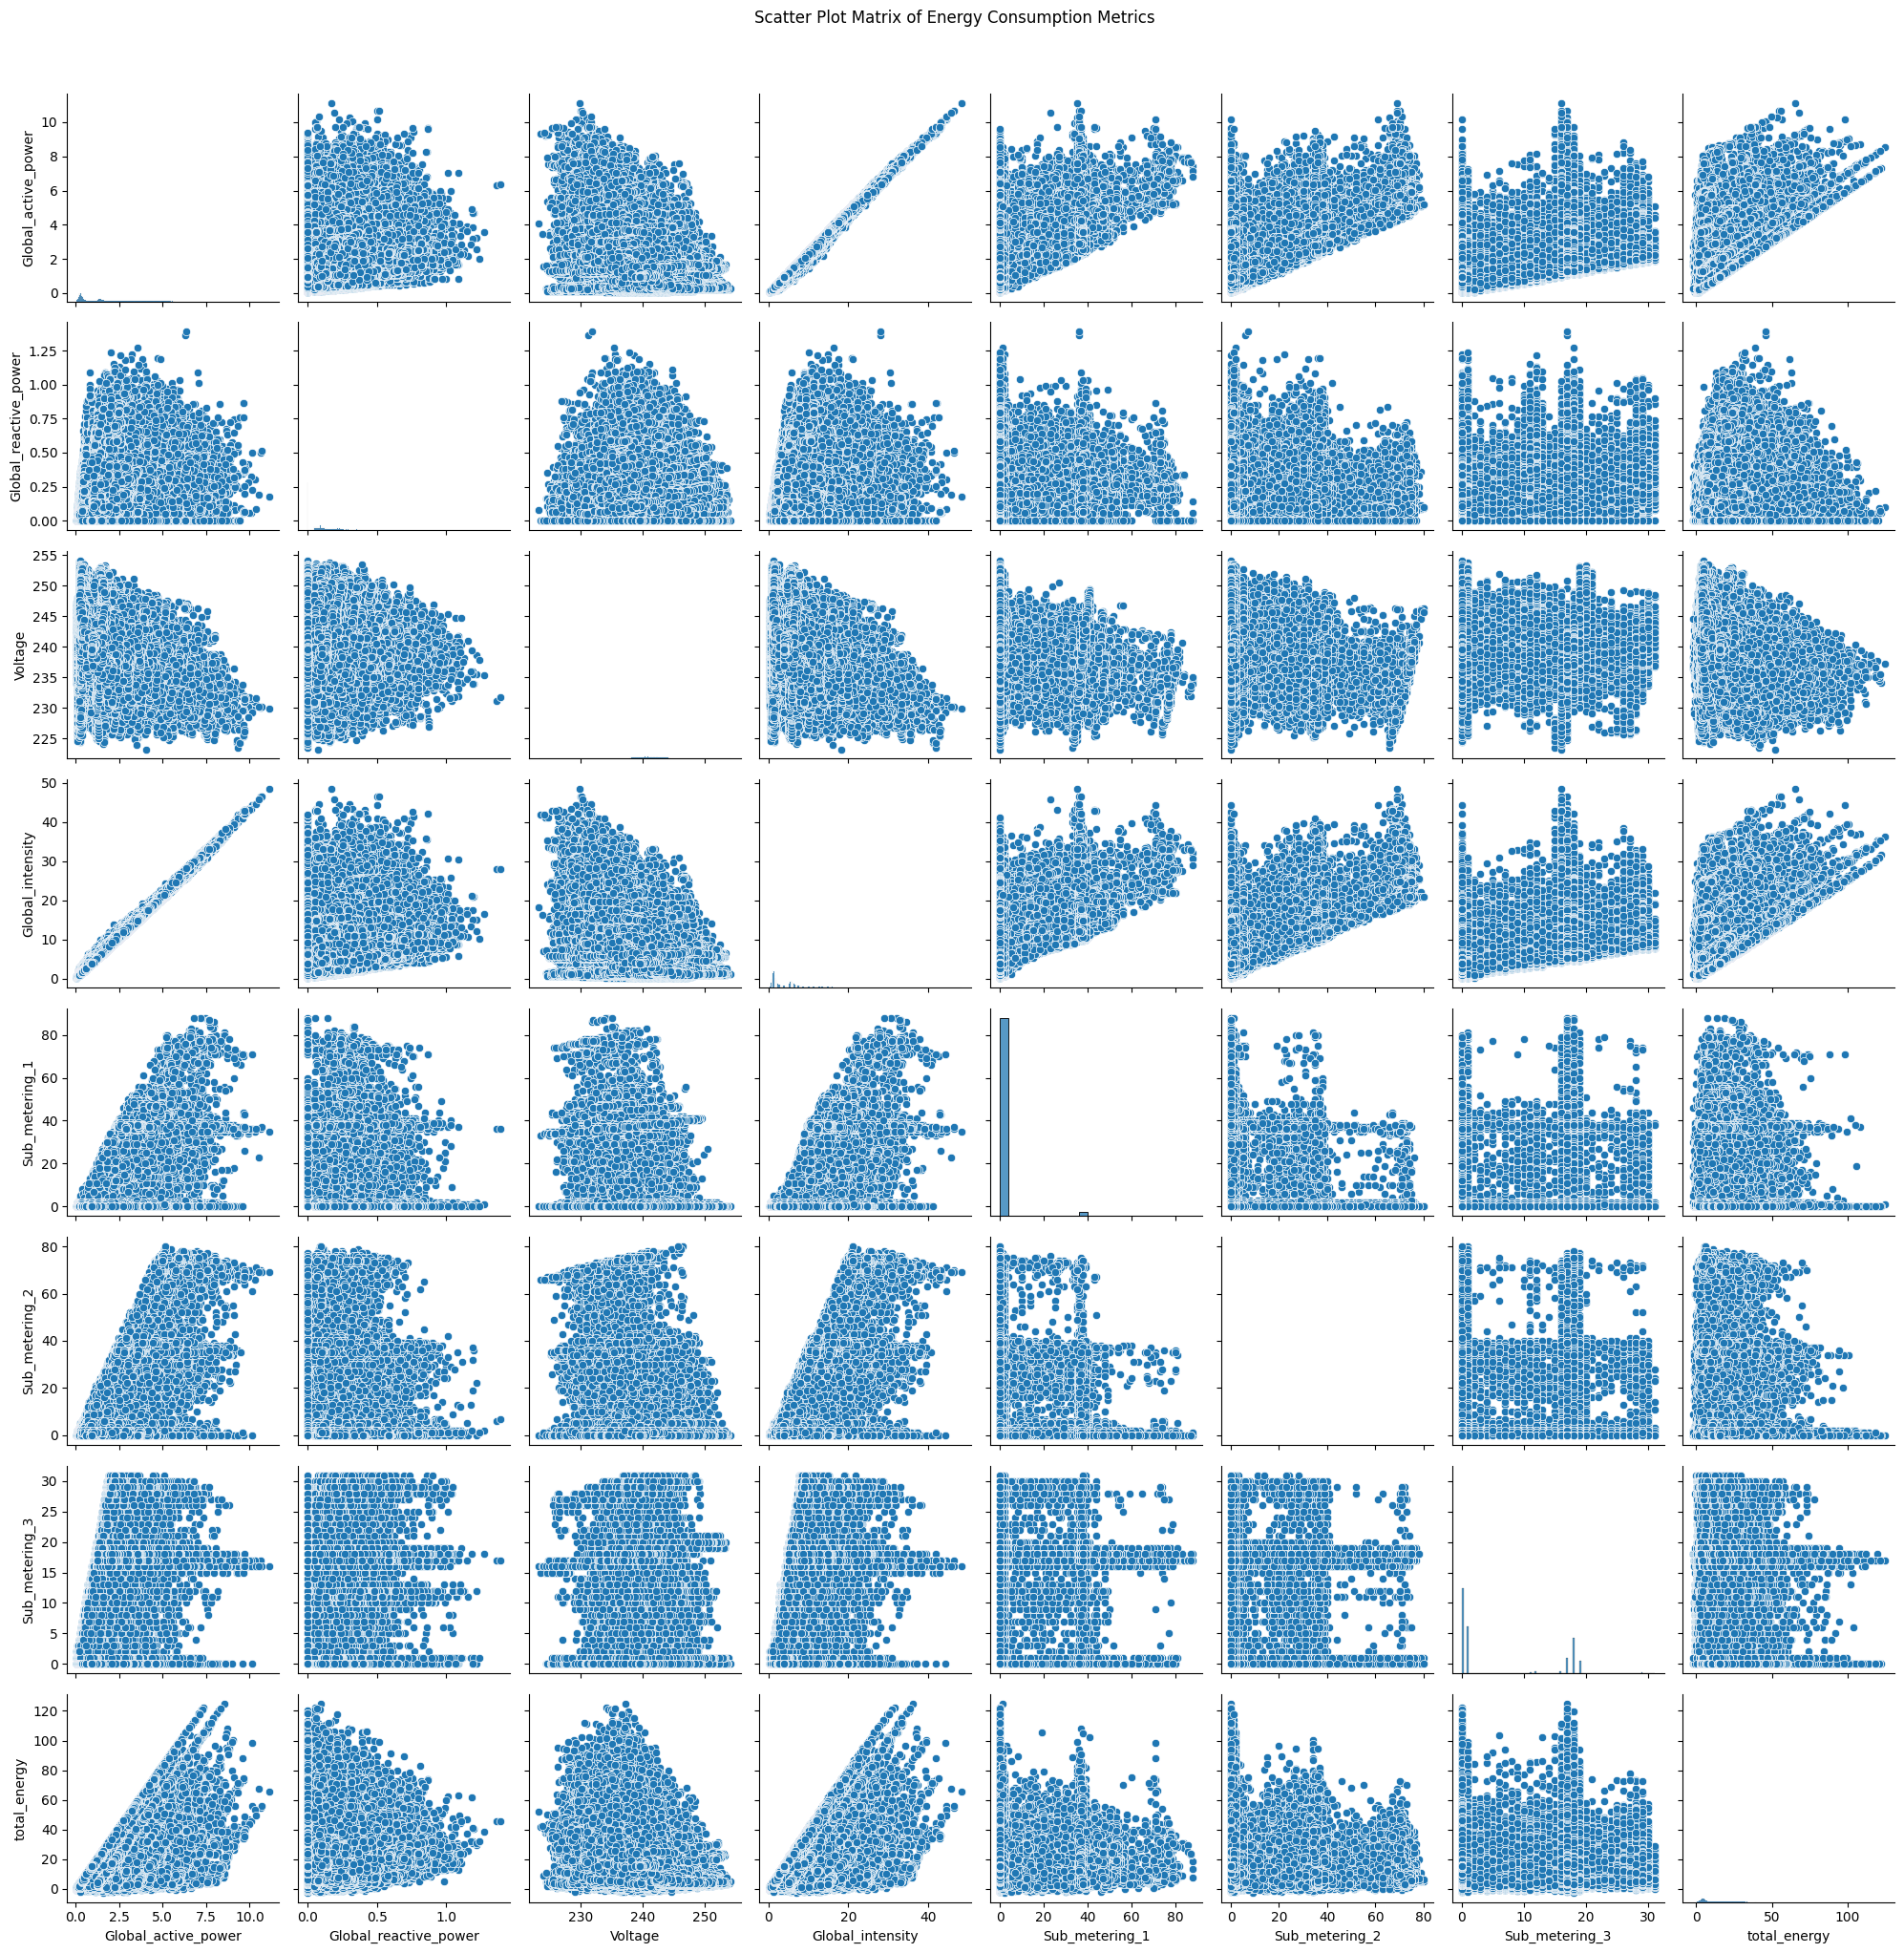

In [12]:

# Scatter plot matrix
sns.pairplot(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
                 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'total_energy']])
plt.suptitle('Scatter Plot Matrix of Energy Consumption Metrics', y=1.02)
plt.tight_layout()
plt.show()

Here are key observations combining the scatter plot analysis with the context of the household data from Sceaux, France:

#### Power Usage Patterns:
- Global active power typically ranges from 0-8 kW, with most usage concentrated in lower ranges (0-4 kW).
- This suggests normal household consumption with occasional high-power events.
- The perfect correlation between global active power and intensity indicates consistent power factor.

#### Sub-metering Distribution:
- The three sub-meters show different patterns, suggesting they monitor different types of appliances or circuits.
- Sub-metering_3 shows higher correlation with total energy consumption compared to sub-meters 1 and 2.
- A large portion of power consumption comes from unmeasured equipment (as indicated by the formula provided).

#### Voltage Characteristics:
- Voltage typically ranges between 230-250V, normal for European households.
- Shows negative correlation with power consumption, indicating voltage drops during high consumption periods.
- This is typical behavior for residential power systems under load.

#### Time-based Insights:
- Over the 47-month period (2006-2010), consumption patterns remain relatively consistent.
- The 1.25% missing values don't significantly impact the overall pattern visibility.
- Data shows both regular usage patterns and occasional extreme events.

#### Energy Efficiency Indicators:
- Reactive power stays relatively low compared to active power.
- This suggests good power factor and efficient energy usage in the household.
- Most energy consumption is captured in measurable, useful work rather than reactive power.

#### Load Distribution:
- Clear upper limits on power consumption suggest circuit breaker or system capacity limits.
- The triangular patterns in many plots indicate that high power usage events are less frequent but regular.

#### Measurement Quality:
- Despite some missing values, the large dataset (2,075,259 measurements) provides robust insights.
- The minute-by-minute granularity captures both short-term variations and long-term patterns.

These observations provide a comprehensive view of this household's electrical consumption patterns and system characteristics over the extended monitoring period.


## 2. Distribution Analysis
Purpose: To understand the distribution of key variables in your dataset.

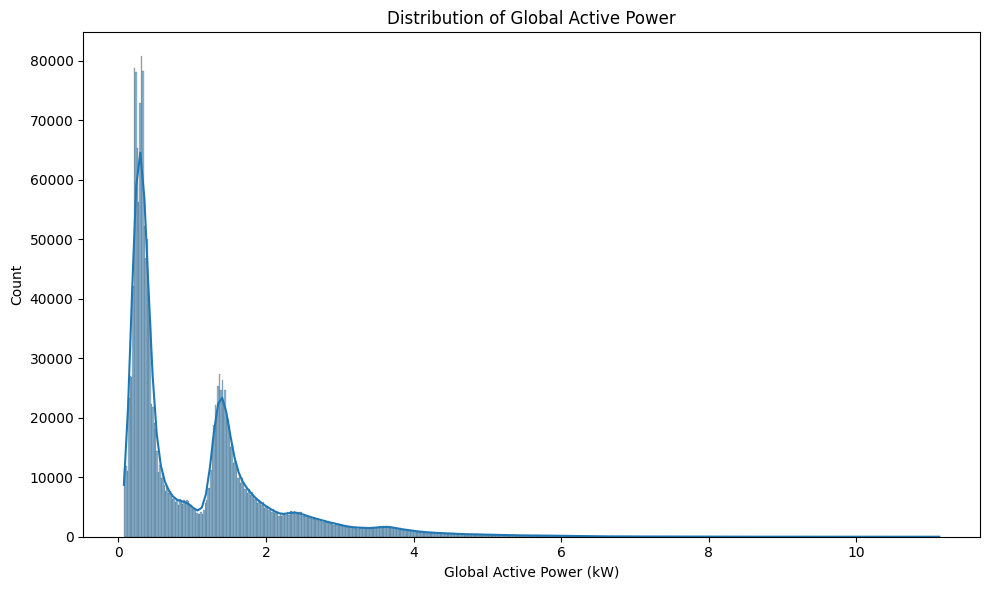

In [13]:
# Distribution of global active power
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_active_power'], kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.tight_layout()
plt.show()



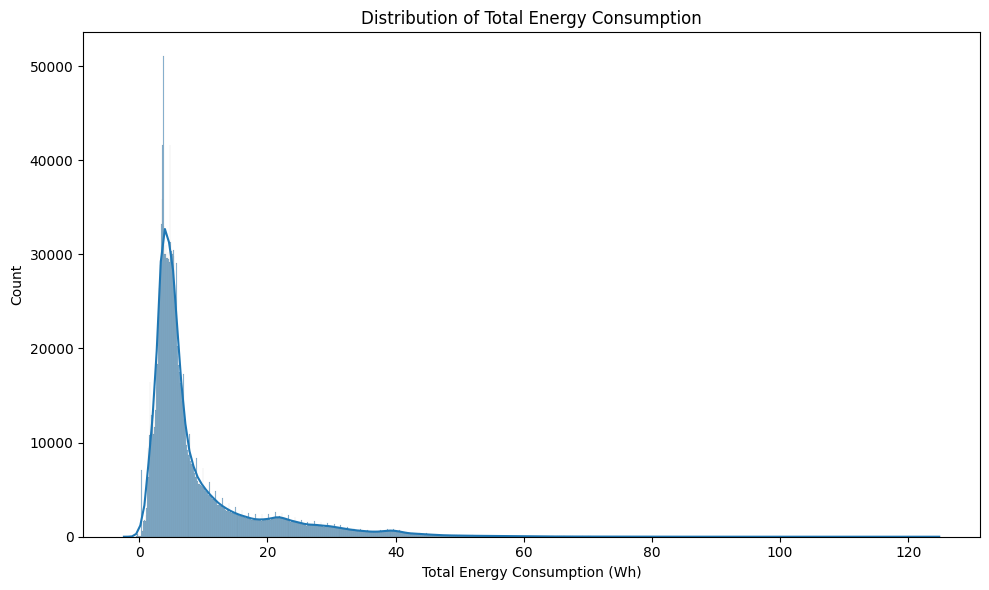

In [14]:
# Distribution of total energy
plt.figure(figsize=(10, 6))
sns.histplot(df['total_energy'], kde=True)
plt.title('Distribution of Total Energy Consumption')
plt.xlabel('Total Energy Consumption (Wh)')
plt.tight_layout()
plt.show()


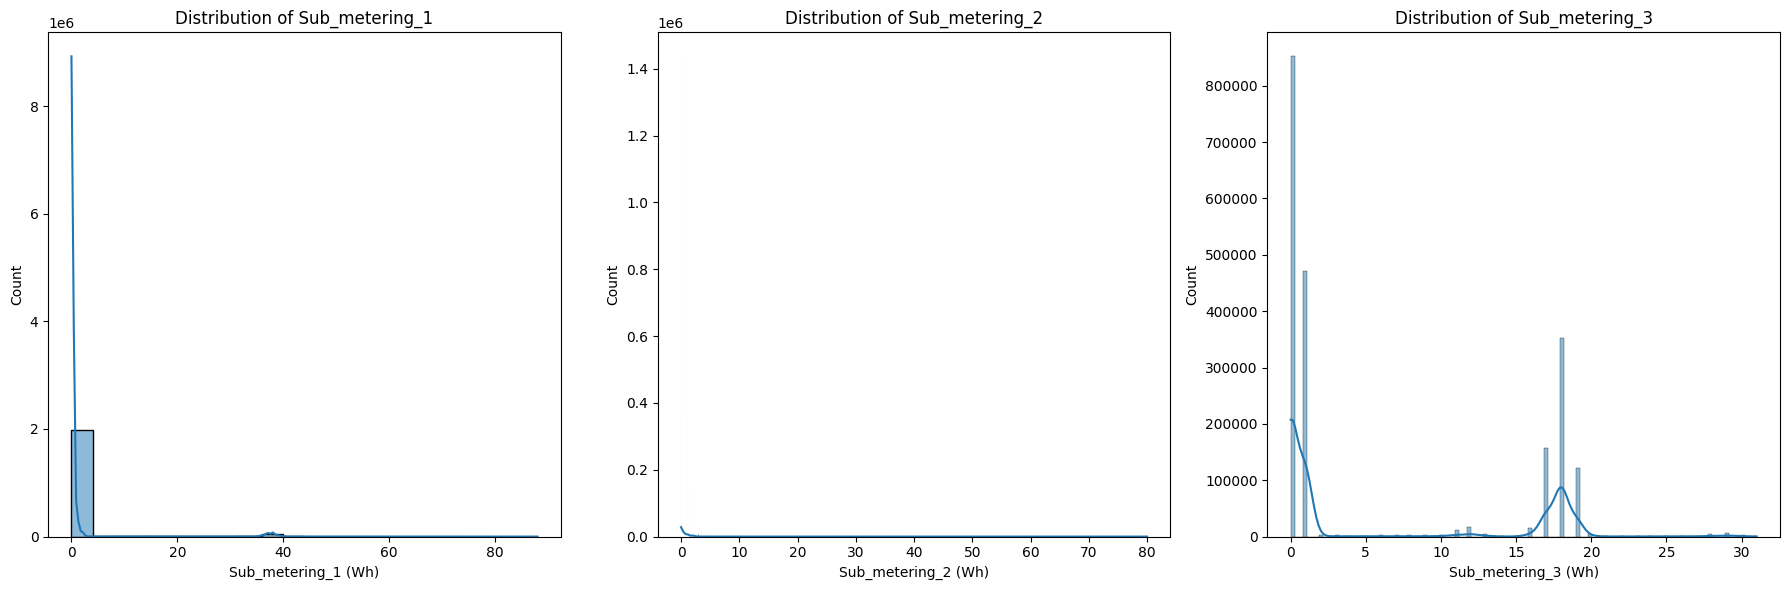

In [15]:

# Distribution of sub-meterings
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(f'{col} (Wh)')
plt.tight_layout()
plt.show()